# Python Assignment

In [1]:
import pandas as pd #To read data files
from matplotlib import pyplot as plt #For charts and Graphs old Library
from matplotlib import style #Colours
import seaborn as sn #for charts and Graphs advanced Library
import numpy as np #For mathematical Operations
import statsmodels.api as sm #Estimate statistical models and perform statistical tests
from scipy import stats #Scipy is a library and Stats is a module which has t-test, ANOVA and Regression
from sklearn.model_selection import train_test_split #train and test Split
from scipy.stats import f_oneway #one way ANOVA
import warnings #for userwarnings

## Creating DataFrame

In [3]:
bol=pd.read_excel("D:/Assignments and Tasks/Trim 4/PBA/Assignment/Python Assignment/bollywood.xlsx")
bol

,SlNo,Release Date,Moviename,Releasetime,Genre,Budget,BoxOfficecollection,Youtubeviews,Youtubelikes,Youtubedislikes
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,2015-02-27,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,2015-03-13,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,2015-03-20,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,2015-03-20,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [4]:
warnings.filterwarnings("ignore",category=UserWarning)

### Checking the Overall Info of the dataset

In [5]:
bol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SlNo                 149 non-null    int64         
 1   Release Date         149 non-null    datetime64[ns]
 2   Moviename            149 non-null    object        
 3   Releasetime          149 non-null    object        
 4   Genre                149 non-null    object        
 5   Budget               149 non-null    int64         
 6   BoxOfficecollection  149 non-null    float64       
 7   Youtubeviews         149 non-null    int64         
 8   Youtubelikes         149 non-null    int64         
 9   Youtubedislikes      149 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 11.8+ KB


## Replacing Release Time Abbreviations with Full Forms

In [6]:
bol['Releasetime'] = bol['Releasetime'].replace({'LW':'Last Week','N':'Normal','HS':'Holiday Season','FS':'First Slot'})
bol

,SlNo,Release Date,Moviename,Releasetime,Genre,Budget,BoxOfficecollection,Youtubeviews,Youtubelikes,Youtubedislikes
0,1,2014-04-18,2 States,Last Week,Romance,36,104.00,8576361,26622,2527
1,2,2013-01-04,Table No. 21,Normal,Thriller,10,12.00,1087320,1129,137
2,3,2014-07-18,Amit Sahni Ki List,Normal,Comedy,10,4.00,572336,586,54
3,4,2013-01-04,Rajdhani Express,Normal,Drama,7,0.35,42626,86,19
4,5,2014-07-04,Bobby Jasoos,Normal,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,2015-02-27,Dum Laga Ke Haisha,Normal,Comedy,15,30.00,3250917,8185,615
145,146,2015-03-13,NH10,Normal,Thriller,13,32.10,5592977,15464,1513
146,147,2015-03-20,Dilliwali Zaalim Girlfriend,Normal,Comedy,32,12.00,2316047,4289,807
147,148,2015-03-20,Hunterrr,Normal,Comedy,5,11.89,4674795,3706,762


## Descriptive Statistics of Numerical columns

In [7]:
N=['Budget','BoxOfficecollection','Youtubeviews','Youtubelikes','Youtubedislikes']
bol[N].describe()

,Budget,BoxOfficecollection,Youtubeviews,Youtubelikes,Youtubedislikes
count,149.000000,149.000000,1.490000e+02,149.000000,149.000000
mean,29.442953,55.667248,3.337920e+06,7877.536913,1207.818792
std,28.237981,94.494531,3.504407e+06,12748.047191,1852.692938
min,2.000000,0.010000,4.354000e+03,1.000000,1.000000
25%,11.000000,8.780000,1.076591e+06,1377.000000,189.000000
50%,21.000000,28.000000,2.375050e+06,4111.000000,614.000000
75%,35.000000,57.450000,4.550051e+06,9100.000000,1419.000000
max,150.000000,735.000000,2.317107e+07,101275.000000,11888.000000


## Group By Release Time, Average Box Office Collection and Average Views Rounded to 2 decimal place and sorted by Box Office Collection hightest to lowest 

In [8]:
bol.groupby('Releasetime')[['BoxOfficecollection','Youtubeviews']].mean().round(2).sort_values('BoxOfficecollection',ascending=False)

,BoxOfficecollection,Youtubeviews
Releasetime,,
Last Week,98.32,3945298.60
First Slot,89.54,4760327.35
Holiday Season,74.62,3162423.72
Normal,39.94,3033549.45


## Group By Genre and Average values of Box Office Collection, then rounded to 2 decimal place and sorted descending

In [9]:
bol.groupby('Genre')[['BoxOfficecollection']].mean().round(2).sort_values(["BoxOfficecollection"],ascending=False)

,BoxOfficecollection
Genre,
Action,91.68
Drama,65.79
Romance,52.84
Comedy,46.12
Thriller,27.94


## Ratio of average BoxOffice Collection by Genre represented by Pie Chart

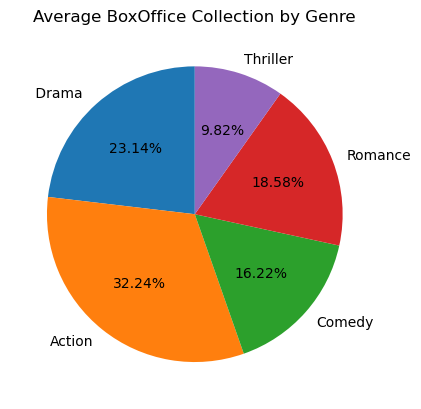

In [10]:
c2=bol.groupby("Genre")["BoxOfficecollection"].mean().reset_index()
plt.pie(c2["BoxOfficecollection"],labels=c2["Genre"], autopct='%.2f%%',startangle=90)
plt.title("Average BoxOffice Collection by Genre")
plt.show()

## Total BoxOffice Collection By Year Visualised Through Bar Chart

In [11]:
bol['Release Date']=pd.to_datetime(bol['Release Date'])
bol['Year']=bol['Release Date'].dt.strftime('%Y')
bol.groupby('Year')[['BoxOfficecollection']].sum().sort_values('BoxOfficecollection',ascending=False)

,BoxOfficecollection
Year,
2014,4317.01
2013,3468.15
2015,509.26


Text(0.5, 1.0, 'Yearly Box Office Collection')

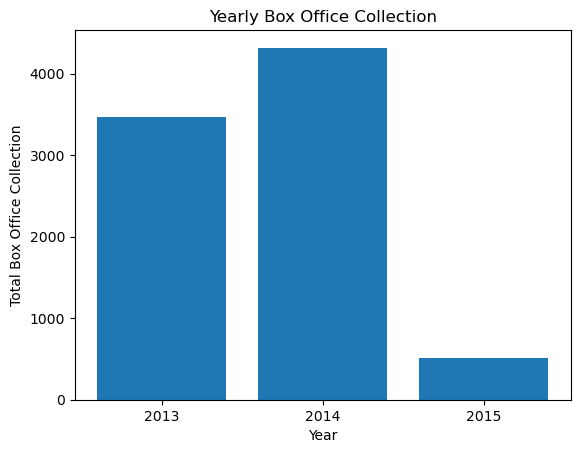

In [12]:
c5=bol.groupby('Year')['BoxOfficecollection'].sum().reset_index()
plt.bar(c5['Year'],c5['BoxOfficecollection'])
plt.xlabel('Year')
plt.ylabel('Total Box Office Collection')
plt.title('Yearly Box Office Collection')

Text(0.5, 1.0, 'Avg Collection By Year and Genre')

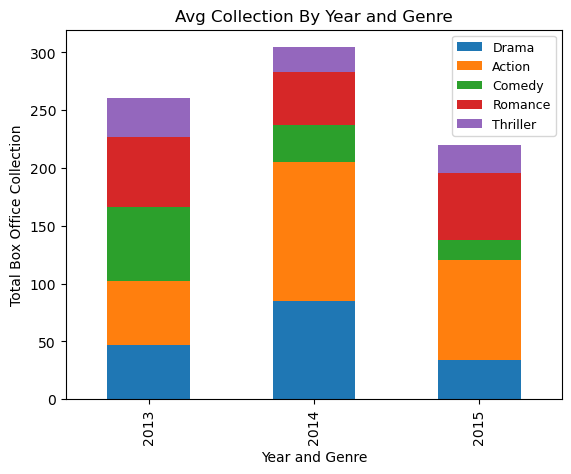

In [13]:
c6=bol.groupby(['Year','Genre'])['BoxOfficecollection'].mean().unstack()
c6.plot(kind="bar",stacked=True)
plt.xlabel('Year and Genre')
plt.legend(('Drama','Action','Comedy','Romance','Thriller'),fontsize=9)
plt.ylabel('Total Box Office Collection')
plt.title('Avg Collection By Year and Genre')

## BoxOffice Collection Trend

Text(0.5, 1.0, 'BoxOffice Collection Trend By Release Date')

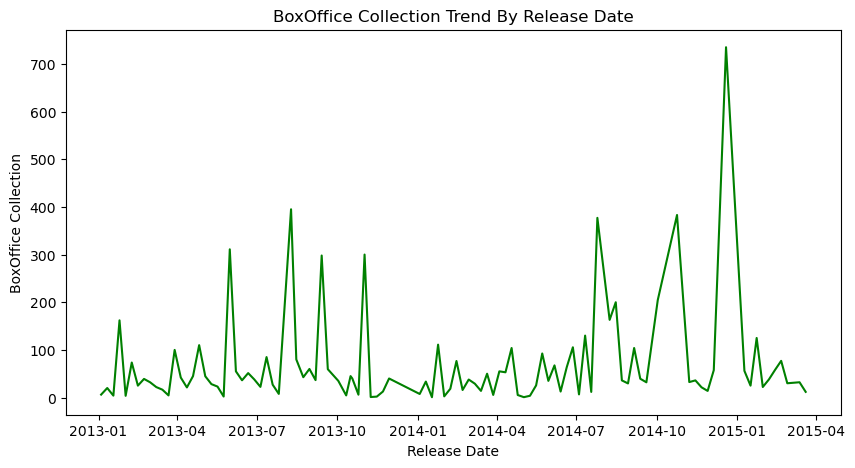

In [14]:
c7=bol.groupby('Release Date')['BoxOfficecollection'].mean().reset_index()
plt.figure(figsize=(10,5))
plt.plot(c7["Release Date"],c7["BoxOfficecollection"],color='Green')
plt.xlabel("Release Date")
plt.ylabel("BoxOffice Collection")
plt.title("BoxOffice Collection Trend By Release Date")

## Independent Samples T-Test to check if there is an impact of movie budget on youtube dislikes

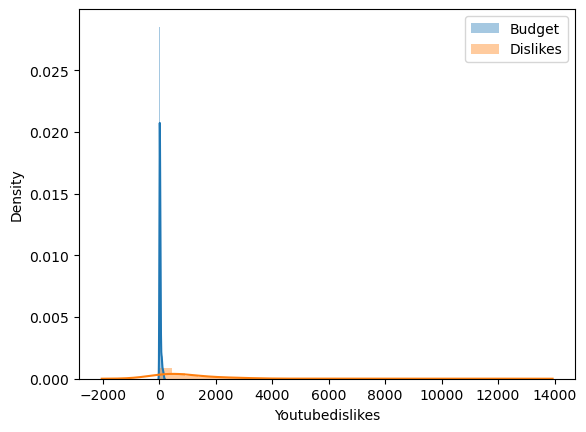

In [44]:
sn.distplot(bol["Budget"], label="Budget")
sn.distplot(bol["Youtubedislikes"], label="Dislikes")
plt.legend()

In [43]:
t=stats.ttest_ind(bol["Budget"],bol["Youtubedislikes"])
t

Ttest_indResult(statistic=-7.762883679399135, pvalue=1.361833361984901e-13)

In [18]:
#Null Hypothesis : There is no Significant impact of movie budget on youtube dislikes
#Alternate Hypothesis : There is a Significant impact of movie budget on youtube dislikes
#Since, pvalue is 1.361833361984901e-13 which is less than 0.05, hence null hypothesis is rejected indicating that 
#there is a significant impact of budget on youtube dislike

## Normalcy Check of Variables

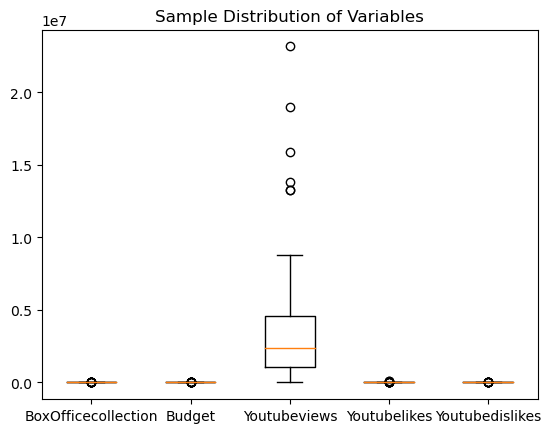

In [25]:
plt.boxplot([bol['BoxOfficecollection'], bol['Budget'], bol['Youtubeviews'], bol['Youtubelikes'], bol['Youtubedislikes']])
plt.xticks([1,2,3,4,5],['BoxOfficecollection', 'Budget', 'Youtubeviews', 'Youtubelikes', 'Youtubedislikes'])
plt.title("Sample Distribution of Variables")
plt.show()

## To check Missing Values

In [26]:
bol.isna().sum()

SlNo                   0
Release Date           0
Moviename              0
Releasetime            0
Genre                  0
Budget                 0
BoxOfficecollection    0
Youtubeviews           0
Youtubelikes           0
Youtubedislikes        0
Year                   0
dtype: int64

## Declaring independent variables for Multiple Linear Regression

In [51]:
x = sm.add_constant(bol[['Budget','Youtubeviews','Youtubelikes','Youtubedislikes']])
x

,const,Budget,Youtubeviews,Youtubelikes,Youtubedislikes
0,1.0,36,8576361,26622,2527
1,1.0,10,1087320,1129,137
2,1.0,10,572336,586,54
3,1.0,7,42626,86,19
4,1.0,18,3113427,4512,1224
...,...,...,...,...,...
144,1.0,15,3250917,8185,615
145,1.0,13,5592977,15464,1513
146,1.0,32,2316047,4289,807
147,1.0,5,4674795,3706,762


## Declaring Dependent variable

In [50]:
y=bol['BoxOfficecollection']
y

0      104.00
1       12.00
2        4.00
3        0.35
4       10.80
        ...  
144     30.00
145     32.10
146     12.00
147     11.89
148    120.00
Name: BoxOfficecollection, Length: 149, dtype: float64

## Training and Testing Set Creation. Here 70% data is used for training the model and 30% is used for Testing

In [53]:
train_x, test_x,train_y, test_y = train_test_split(x,y,train_size=0.7,random_state=100)

## Model Fitting Using Ordinary least squares Method

In [55]:
bol_b=sm.OLS(train_y, train_x).fit()

## Parameter Estimation

In [56]:
print(bol_b.params.round(2))

const             -0.62
Budget             1.49
Youtubeviews      -0.00
Youtubelikes       0.00
Youtubedislikes   -0.01
dtype: float64


In [32]:
# Parameter Estimation, Youtubedislike has an inverse relation with BoxOffice Collection this indicates that 1% change in youtubedislikes would decrease the boxoffice collection by Rs -0.01
# Parameter Estimation, Budget has a direct relation with BoxOffice Collection indicating that 1% change in budget would increase the boxoffice collection by Rs 1.49

## Summary of Regression Results

In [57]:
bol_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     BoxOfficecollection   R-squared:                       0.644
Model:                             OLS   Adj. R-squared:                  0.630
Method:                  Least Squares   F-statistic:                     44.76
Date:                 Fri, 06 Oct 2023   Prob (F-statistic):           2.08e-21
Time:                         14:15:42   Log-Likelihood:                -534.12
No. Observations:                  104   AIC:                             1078.
Df Residuals:                       99   BIC:                             1091.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6184      7.045     -0.088      0.930     -14.598      13.361
Budget              1.4891      0.256      5.809      0.000       0.980       1.998
Youtubeviews    -3.628e-06   3.17e-06     -1.143      0.256   -9.92e-06    2.67e-06
Youtubelikes        0.0043      0.001      5.765      0.000       0.003       0.006
Youtubedislikes    -0.0131      0.006     -2.287      0.024      -0.024      -0.002
==============================================================================
Omnibus:                      101.067   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1225.667
Skew:                           3.195   Prob(JB):                    7.08e-267
Kurtosis:                      18.556   Cond. No.                     7.70e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
#Independent variables are explaining the dependent variable by 63%

## Predicting the Box Office Collection of the Test Set and Sorting Descending

In [35]:
print("Predicted Box Office Collection")
Predicted=bol_b.predict(test_x).sort_values(ascending=False)
Predicted
#test_x is used as test input data to check how well the model can perform in new dataset 

Predicted Box Office Collection


119    240.970546
148    228.797223
89     191.544964
26     189.604981
41     181.600319
116    139.784328
115    117.597961
16      87.292698
12      79.097332
75      76.809628
118     75.285433
90      71.714651
114     69.174036
134     67.846446
73      56.944964
45      54.362992
145     45.156037
69      42.956392
123     42.601134
102     41.264947
37      38.823184
77      38.542045
97      38.497648
144     37.076338
62      34.608038
32      27.605216
135     24.114085
112     20.818737
125     20.132066
81      20.106071
40      19.436140
29      17.678825
20      16.615787
120     16.587710
109     14.141189
1       13.390536
128     12.536409
51       8.524362
46       8.292383
99       7.956682
31       7.399750
11       5.283256
15       5.086096
122      3.754694
28     -33.623150
dtype: float64

## Residual Calculation

In [36]:
residual=test_y-Predicted
residual_1=pd.DataFrame({'Actual':test_y,'Predicted':Predicted,'Residual':residual}).sort_values('Residual',ascending=False)
print("Residual Or Error Calculation")
residual_1
#Test input data is compared with the target  variable to check the fitness of the model like how accurately
#it is predicting the target variable

Residual Or Error Calculation


,Actual,Predicted,Residual
89,735.00,191.544964,543.455036
115,395.00,117.597961,277.402039
26,383.00,189.604981,193.395019
37,130.00,38.823184,91.176816
16,162.00,87.292698,74.707302
135,85.00,24.114085,60.885915
28,27.16,-33.623150,60.783150
119,300.00,240.970546,59.029454
32,65.00,27.605216,37.394784
90,100.00,71.714651,28.285349


## Scatter Plot to Show the Distribution of the Residual Values

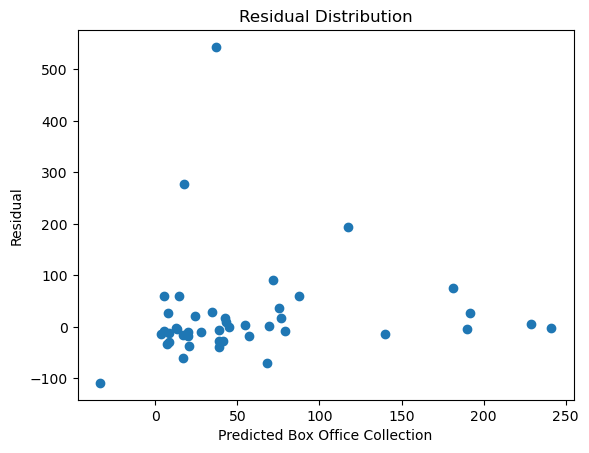

In [37]:
c9=residual_1.groupby('Predicted')['Residual'].sum().reset_index()
plt.scatter(Predicted,residual)
plt.xlabel('Predicted Box Office Collection')
plt.ylabel('Residual')
plt.title('Residual Distribution')
plt.show()